# Packages Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Data Loading

In [2]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

In [3]:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

# Combining Datasets

In [4]:
white['type'] =0
red['type'] =1

data=[red,white]
wines=pd.concat(data)

# Preparing the Data

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [8]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [9]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

# Data Visualization

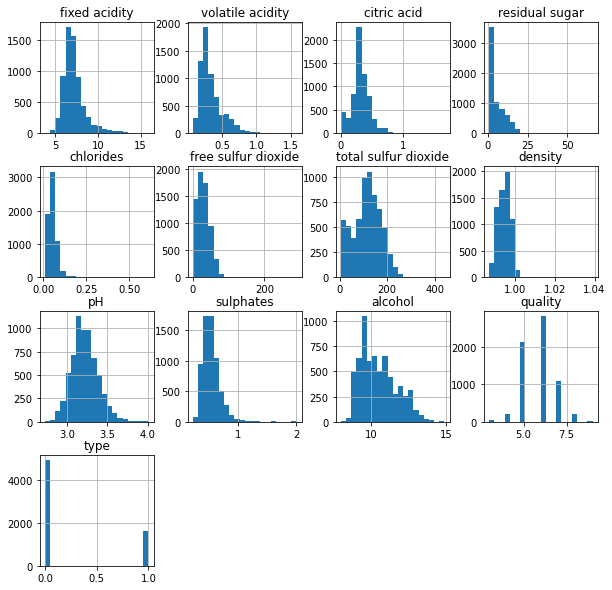

In [10]:
wines.hist(bins=20, figsize=(10, 10))
plt.show()

# Ploting Heatmap

In [ ]:
import matplotlib.pyplot as plt

In [1]:
plt.figure(figsize=(12, 12))
sb.heatmap(wines.corr() > 0.7, annot=True, cbar=False)
plt.show()

NameError: name 'plt' is not defined

# Splitting the data set for training and validation

In [13]:
X=wines.loc[:,wines.columns!='type'].values
y=wines.loc[:,'type'].values

In [14]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [15]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.25,random_state=45)

# Structure of a Neural Network

In [17]:
model = Sequential([

    Dense(12, activation ='relu', input_shape =(12,)),
 
    Dense(9, activation ='relu'),
    Dense(7, activation ='relu'),
 
    Dense(1, activation ='sigmoid')
])


In [18]:
model.output_shape


(None, 1)

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 9)                 117       
                                                                 
 dense_2 (Dense)             (None, 7)                 70        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.get_weights()

[array([[-0.33069384, -0.31443536, -0.08463037,  0.32637417, -0.21097219,
          0.10051835, -0.48117578,  0.31621456, -0.09396923,  0.00263536,
         -0.47295105, -0.31621134],
        [-0.03804469,  0.45782888,  0.24636018, -0.3076619 , -0.46160066,
          0.35152745,  0.22366464,  0.4433155 ,  0.25970185,  0.2736194 ,
         -0.05420601,  0.09074295],
        [ 0.2121309 ,  0.30902827,  0.34895754,  0.46350753,  0.29279113,
         -0.49604332,  0.17687964, -0.03842866, -0.00566947, -0.34704018,
          0.04514635,  0.3686285 ],
        [ 0.012218  , -0.25044596,  0.48690045, -0.38749933, -0.4898578 ,
         -0.36435115,  0.39848447, -0.2615093 ,  0.3814429 ,  0.08984196,
         -0.33948565, -0.40724242],
        [-0.14320362,  0.4125172 , -0.06042635, -0.12070858,  0.4895289 ,
          0.31234157,  0.4286214 , -0.06259108,  0.19196665,  0.08627903,
          0.16327858, -0.3559625 ],
        [ 0.47425556, -0.01609182, -0.41344917, -0.00894642,  0.26998508,
      

In [21]:
model.compile(loss ='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

# Model Training

In [22]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs = 50, batch_size = 16, verbose = 1)

Epoch 1/50
244/244 [==============================] - 2s 3ms/step - loss: 0.2476 - accuracy: 0.9228 - val_loss: 0.2120 - val_accuracy: 0.9333
Epoch 2/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1904 - accuracy: 0.9348 - val_loss: 0.1936 - val_accuracy: 0.9405
Epoch 3/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9374 - val_loss: 0.1806 - val_accuracy: 0.9364
Epoch 4/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.9382 - val_loss: 0.1877 - val_accuracy: 0.9405
Epoch 5/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9433 - val_loss: 0.1663 - val_accuracy: 0.9436
Epoch 6/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.9448 - val_loss: 0.1545 - val_accuracy: 0.9446
Epoch 7/50
244/244 [==============================] - 0s 2ms/step - loss: 0.1465 - accuracy: 0.9471 - val_loss: 0.1547 - val_accuracy: 0.9559
Epoch 

# Predicting Values

In [23]:
y_pred = model.predict(X_test)
print(y_pred)

51/51 [==============================] - 0s 1ms/step
[[5.3803506e-03]
 [1.0262623e-02]
 [3.1847743e-05]
 ...
 [2.4805097e-03]
 [9.9977320e-01]
 [7.0350207e-03]]


# Pickling The Model for Deployment

In [25]:
pickle.dump(model, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2022-12-08 02:28:03         2246
metadata.json                                  2022-12-08 02:28:03           64
variables.h5                                   2022-12-08 02:28:03        31240


In [26]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-08 02:28:02         2246
metadata.json                                  2022-12-08 02:28:02           64
variables.h5                                   2022-12-08 02:28:02        31240
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
51/51 [==============================] - 0s 

array([[5.3803506e-03],
       [1.0262623e-02],
       [3.1847743e-05],
       ...,
       [2.4805097e-03],
       [9.9977320e-01],
       [7.0350207e-03]], dtype=float32)